In [60]:
import numpy    as np
from numpy.testing._private.utils import decorate_methods
import pandas   as pd
import seaborn  as sb
import matplotlib.pyplot as plt
import sklearn  as skl
import time

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

from sklearn.tree          import DecisionTreeRegressor
from sklearn.ensemble      import RandomForestRegressor
from sklearn.ensemble      import ExtraTreesRegressor
from sklearn.ensemble      import AdaBoostRegressor
from sklearn.ensemble      import GradientBoostingRegressor
from xgboost               import XGBRegressor
from lightgbm              import LGBMRegressor
from catboost              import CatBoostRegressor




In [61]:
df = pd.read_csv('heart.csv')
df=df.drop_duplicates()
print(df)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

In [62]:
col_names = df.columns
for col in col_names:
    uv_values = df[col].nunique()
    print(f'{col}:{uv_values}')



age:41
sex:2
cp:4
trtbps:49
chol:152
fbs:2
restecg:3
thalachh:91
exng:2
oldpeak:40
slp:3
caa:5
thall:4
output:2


In [63]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [65]:
df.duplicated().sum()

0

<AxesSubplot:>

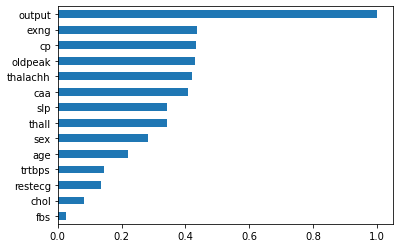

In [66]:
df.corr()['output'].abs().sort_values().plot(kind = 'barh')

In [67]:
df['age_class'] = pd.cut(df['age'], bins=[29,44,59,80], labels = [0, 1, 2])
df['chol']= pd.cut(df['chol'], bins=[0,200,239,564], labels = [0,1,2])
df['trtbps']= pd.cut(df['trtbps'], bins=[94,120,129,139,159,200], labels = [0,1,2,3,4])
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_class
0,63,1,3,3,1,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,2,2,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,2,1,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,0,1,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,0,2,0,1,163,1,0.6,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,3,2,0,1,123,1,0.2,1,0,3,0,1
299,45,1,3,0,2,0,1,132,0,1.2,1,0,3,0,1
300,68,1,0,3,0,1,1,141,0,3.4,1,2,3,0,2
301,57,1,0,2,0,0,1,115,1,1.2,1,1,3,0,1


In [ ]:
n =[]
def data_enhancement(data):  
      
    gen_data = data
    
    for rest_ecg in data['restecg'].unique():
        seasonal_data =  gen_data[gen_data['restecg'] == rest_ecg]
        thalachh_std = seasonal_data['thalachh'].std()
        oldpeak_std = seasonal_data['oldpeak'].std()
        
        for i in gen_data[gen_data['restecg'] == rest_ecg].index:
            # k = gen_data['thalachh'].values[i]
            # print (k.shape)
            n.append(i)
           
            if np.random.randint(2) == 1:
                gen_data['thalachh'].values[i] += thalachh_std/10
    #         else:
    #             gen_data['thalachh'].values[i] -= thalachh_std/10
                
    #         if np.random.randint(2) == 1:
    #             gen_data['oldpeak'].values[i] += oldpeak_std/10
    #         else:
    #             gen_data['oldpeak'].values[i] -= oldpeak_std/10
                
    # return gen_data

#print(df.head(3))
gen = data_enhancement(df)
print(len(n))
#print(gen.head(3) )